In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
import random
%matplotlib inline

In [2]:
data = pd.read_csv("dataexercise2.csv")

In [3]:
x=data.drop(columns=["y"])

In [4]:
t = data["y"]
logtf= [np.log(math.factorial(i)) for i in t]

In [5]:
acc_count=0
w_samples = []
#w = np.random.randn(4,1)
w = np.array([ 1.12649475,  0.42890301,  0.01506197, -0.05408826])
w = np.expand_dims(w, axis=1) # initial value
jump_sigma = 0.067 # standard deviation of gaussian proposal
n_samps = 1000 # number of samples to take
sig_sq = 25 # prior variance
for samp in range(n_samps):
    # generate w_new
    w_new = w + np.random.randn(4,1)*jump_sigma
    # compute the prior ratio
    r = -((w.shape[0]/2)*np.log(2*np.pi))-(w.shape[0]*np.log(sig_sq**(1/2)))-(1.0/(2.0*sig_sq))*np.dot(w_new.T,w_new).flatten()
    r -= -((w.shape[0]/2)*np.log(2*np.pi))-(w.shape[0]*np.log(sig_sq**(1/2)))-(1.0/(2.0*sig_sq))*np.dot(w.T,w).flatten()
    # incorporate the likelihood part
    P_new = np.exp(np.dot(x,w_new))
    P = np.exp(np.dot(x,w))
    r += np.sum(np.multiply(t,np.dot(x,w_new).flatten()) - P_new.flatten() - logtf)
    r -= np.sum(np.multiply(t,np.dot(x,w).flatten()) - P.flatten()- logtf)
    if np.exp(r)>=1:
        # accept
        w = w_new
        acc_count+=1
    else:
        if random.uniform(0,1) <= np.exp(r):
            # accept
            w = w_new
            acc_count+=1
        else:
            # reject
            pass
    w_samples.append(w.flatten())
print("Acceptance Rate: " + str((acc_count/n_samps)*100))

Acceptance Rate: 36.0


In [6]:
w_samples_cleaned=w_samples[100:]

In [7]:
posterior_MC=sum(w_samples_cleaned)/len(w_samples_cleaned)
print("Monte-Carlo estimate of the posterior mean of theta: "+str(posterior_MC))

Monte-Carlo estimate of the posterior mean of theta: [ 1.10097793  0.43114219  0.03473543 -0.06949901]


In [8]:
w1= [i[0] for i in w_samples]
w2= [i[1] for i in w_samples]

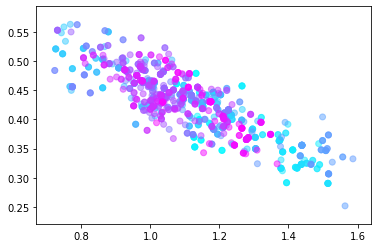

In [9]:
import matplotlib.cm as cm 
colors = cm.cool(np.linspace(0, 1,(n_samps)))
plt.scatter(w1,w2,c=colors,alpha=0.5)
plt.show()

In [10]:
def sample_sigma(w, alpha, beta):
    alpha_new = (alpha + 1/2)
    beta_new = (beta + (np.dot(w.T,w))/2)
    return (1/np.random.gamma(alpha_new, (1/beta_new)))

In [11]:
alpha = beta= 0.1
acc_count=0
w_samples = []
sig_samples =[]
#w = np.random.randn(4,1)
w = np.array([ 1.12649475,  0.42890301,  0.01506197, -0.05408826])
w = np.expand_dims(w, axis=1) # initial value
jump_sigma = 0.067 # standard deviation of gaussian proposal
n_samps = 1000 # number of samples to take
sig_sq = (1/np.random.gamma(alpha, (1/beta))) # prior variance
for samp in range(n_samps):
    # generate w_new
    w_new = w + np.random.randn(4,1)*jump_sigma
    # compute the prior ratio
    r = -((w.shape[0]/2)*np.log(2*np.pi))-(w.shape[0]*np.log(sig_sq**(1/2)))-(1.0/(2.0*sig_sq))*np.dot(w_new.T,w_new).flatten()
    r -= -((w.shape[0]/2)*np.log(2*np.pi))-(w.shape[0]*np.log(sig_sq**(1/2)))-(1.0/(2.0*sig_sq))*np.dot(w.T,w).flatten()
    # incorporate the likelihood part
    P_new = np.exp(np.dot(x,w_new))
    P = np.exp(np.dot(x,w))
    r += np.sum(np.multiply(t,np.dot(x,w_new).flatten()) - P_new.flatten() - logtf)
    r -= np.sum(np.multiply(t,np.dot(x,w).flatten()) - P.flatten()- logtf)
    if np.exp(r)>=1:
        # accept
        w = w_new
        acc_count+=1
    else:
        if random.uniform(0,1) <= np.exp(r):
            # accept
            w = w_new
            acc_count+=1
        else:
            # reject
            pass
    w_samples.append(w.flatten())
    sig_sq=sample_sigma(w.flatten(),alpha,beta)
    sig_samples.append(sig_sq)
print("Acceptance Rate: " + str((acc_count/n_samps)*100))

Acceptance Rate: 36.9


In [12]:
m = np.clip(sig_samples,0,1000)

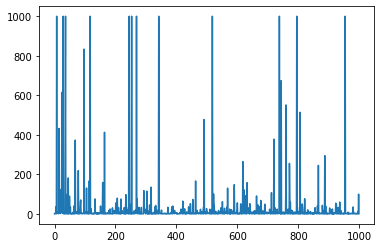

In [13]:
plt.plot(m)